In [8]:
!pip install seaborn

# box plot for rating part

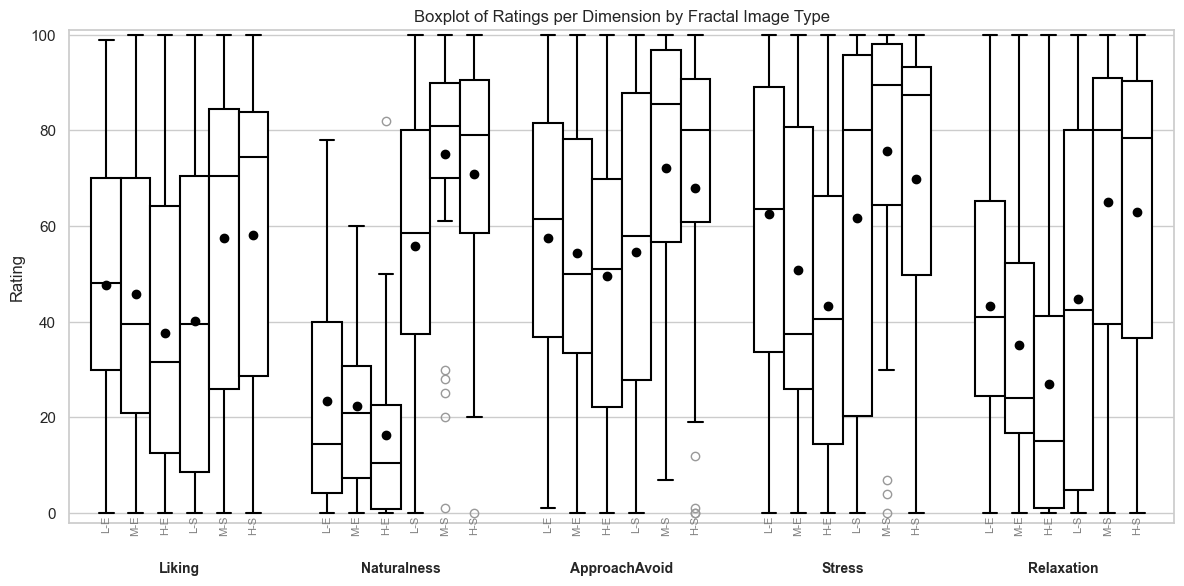

Before removing outliers: 1080
After removing outliers: 1080
Empty DataFrame
Columns: [ID, Dimension, ImageType, Rating, _merge]
Index: []


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load Excel file
df = pd.read_excel("/Users/jiaonahu/Documents/mpib/fractalvr-writting/rating.xlsx")

# Rename first column to 'ID' if needed
if df.columns[0] != "ID":
    df.rename(columns={df.columns[0]: "ID"}, inplace=True)

# Rename variable columns
column_mapping = {
    'v_130': 'A1_Liking', 'v_131': 'A1_Naturalness', 'v_143': 'A1_ApproachAvoid', 'v_134': 'A1_Stress', 'v_135': 'A1_Relaxation',
    'v_136': 'A2_Liking', 'v_137': 'A2_Naturalness', 'v_144': 'A2_ApproachAvoid', 'v_139': 'A2_Stress', 'v_140': 'A2_Relaxation',
    'v_141': 'A3_Liking', 'v_142': 'A3_Naturalness', 'v_145': 'A3_ApproachAvoid', 'v_146': 'A3_Stress', 'v_147': 'A3_Relaxation',
    'v_148': 'B1_Liking', 'v_149': 'B1_Naturalness', 'v_150': 'B1_ApproachAvoid', 'v_151': 'B1_Stress', 'v_152': 'B1_Relaxation',
    'v_153': 'B2_Liking', 'v_154': 'B2_Naturalness', 'v_155': 'B2_ApproachAvoid', 'v_156': 'B2_Stress', 'v_157': 'B2_Relaxation',
    'v_158': 'B3_Liking', 'v_159': 'B3_Naturalness', 'v_160': 'B3_ApproachAvoid', 'v_161': 'B3_Stress', 'v_162': 'B3_Relaxation'
}
df = df.rename(columns=column_mapping)

# Map image codes to labels
label_mapping = {
    'A1': 'L-E', 'A2': 'M-E', 'A3': 'H-E',
    'B1': 'L-S', 'B2': 'M-S', 'B3': 'H-S'
}
dimensions = ['Liking', 'Naturalness', 'ApproachAvoid', 'Stress', 'Relaxation']

# Convert to long format
long_data = []
for idx, row in df.iterrows():
    user_id = row["ID"]
    for old_label, new_label in label_mapping.items():
        for dim in dimensions:
            col_name = f"{old_label}_{dim}"
            long_data.append({
                'ID': user_id,
                'Dimension': dim,
                'ImageType': new_label,
                'Rating': row[col_name]
            })
df_long = pd.DataFrame(long_data)

# Remove specific participants
df_long = df_long[~df_long["ID"].isin(["0DT2", "JGMJ5P", "MX16R1", "VU30R8"])]

# Flip the scales for Naturalness and ApproachAvoid
df_long.loc[df_long["Dimension"] == "Naturalness", "Rating"] = 100 - df_long.loc[df_long["Dimension"] == "Naturalness", "Rating"]
df_long.loc[df_long["Dimension"] == "ApproachAvoid", "Rating"] = 100 - df_long.loc[df_long["Dimension"] == "ApproachAvoid", "Rating"]

# Save version before outlier removal
df_long_before_outlier_removal = df_long.copy()

# Remove outliers: keep only values within ±2.5 SD for each dimension
df_long = df_long[
    df_long.groupby("Dimension")["Rating"]
    .transform(lambda x: abs(x - x.mean()) <= 2.5 * x.std())
]

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=df_long,
    x="Dimension",
    y="Rating",
    hue="ImageType",
    palette=["white"] * 6,       # black & white style
    linewidth=1.5,
    showmeans=True,
    showfliers=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"},
    boxprops=dict(facecolor='white', edgecolor='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='black')
)

# Remove legend
ax.legend_.remove()

# Add small image type labels below each box
labels = ['L-E', 'M-E', 'H-E', 'L-S', 'M-S', 'H-S']
num_dims = len(dimensions)
width = 0.8
step = width / len(labels)

for i, dim in enumerate(dimensions):
    center = i
    start = center - width / 2 + step / 2
    for j, label in enumerate(labels):
        x_pos = start + j * step
        ax.text(x_pos, -0.5, label, rotation=90, ha='center', va='top', fontsize=8, color='gray')

# Hide default x-axis tick labels
ax.set_xticklabels([])

# Add custom dimension labels lower on axis
for i, dim in enumerate(dimensions):
    ax.text(i, -0.08, dim, transform=ax.get_xaxis_transform(), ha='center', va='top',
            fontsize=10, fontweight='bold')

# Final layout
plt.title("Boxplot of Ratings per Dimension by Fractal Image Type")
plt.ylabel("Rating")
plt.xlabel("")
plt.ylim(df_long["Rating"].min() - 2, df_long["Rating"].max() + 1)
plt.tight_layout()

# Save and show
plt.savefig("/Users/jiaonahu/Desktop/fractal_ratings_boxplot_bw_nolegend.png", dpi=300)
plt.show()

# Print counts before/after outlier removal
print("Before removing outliers:", len(df_long_before_outlier_removal))
print("After removing outliers:", len(df_long))

outliers_removed = pd.merge(
    df_long_before_outlier_removal,
    df_long,
    how='outer',
    indicator=True
).query('_merge == "left_only"')

print(outliers_removed.head())


The perceptual evaluations of fractal images revealed both crossover and consistent trends across different dimensions. For Liking and Approach–Avoidance, participants showed a crossover effect depending on complexity: while exact fractals were preferred at low complexity, statistical fractals received higher ratings at medium and high complexity levels. 

In contrast, Naturalness, Stress, and Relaxation displayed consistent patterns. Across all complexity levels, statistical fractals were perceived as more natural, less stressful, and more relaxing compared to exact fractals.

In [8]:
pip install pingouin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 11.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 11.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# analyse - liking

In [10]:
import pandas as pd
import pingouin as pg

# Load Excel file
df = pd.read_excel("/Users/jiaonahu/Documents/mpib/fractalvr-writting/rating.xlsx")

# Rename first column if needed
if df.columns[0] != "ID":
    df.rename(columns={df.columns[0]: "ID"}, inplace=True)

# Rename only Liking columns
column_mapping = {
    'v_130': 'A1_Liking', 'v_136': 'A2_Liking', 'v_141': 'A3_Liking',
    'v_148': 'B1_Liking', 'v_153': 'B2_Liking', 'v_158': 'B3_Liking'
}
df = df.rename(columns=column_mapping)

# Label mapping
label_mapping = {
    'A1': ('L', 'E'), 'A2': ('M', 'E'), 'A3': ('H', 'E'),
    'B1': ('L', 'S'), 'B2': ('M', 'S'), 'B3': ('H', 'S')
}

# Create long format for Liking
long_data = []
for idx, row in df.iterrows():
    user_id = row["ID"]
    for code, (complexity, ftype) in label_mapping.items():
        rating = row[f"{code}_Liking"]
        long_data.append({
            "ID": user_id,
            "Complexity": complexity,
            "FractalType": ftype,
            "Rating": rating
        })

df_long = pd.DataFrame(long_data)

# Remove specific participants
df_long = df_long[~df_long["ID"].isin(["0DT2", "JGMJ5P", "MX16R1", "VU30R8"])]

# Remove outliers (±2.5 SD) within each complexity level
df_long = df_long[
    df_long.groupby("Complexity")["Rating"]
    .transform(lambda x: abs(x - x.mean()) <= 2.5 * x.std())
]

# 🔹 1. Repeated Measures ANOVA
anova_result = pg.rm_anova(
    data=df_long,
    dv='Rating',
    within=['Complexity', 'FractalType'],
    subject='ID',
    detailed=True
)
print("\n--- Repeated Measures ANOVA ---")
print(anova_result)

# 🔹 2. Pairwise comparisons (FractalType within each complexity level)
pairwise = pg.pairwise_tests(
    data=df_long,
    dv='Rating',
    within='FractalType',
    subject='ID',
    between='Complexity',  # 用 between 分层执行 pairwise
    parametric=True,
    padjust='bonf'
)
print("\n--- Pairwise Comparisons ---")
print(pairwise)

# 🔹 3. Paired t-tests: E vs S within each complexity
ttest_results = []
for lvl in ['L', 'M', 'H']:
    sub_df = df_long[df_long['Complexity'] == lvl]
    t = pg.ttest(
        sub_df[sub_df['FractalType'] == 'E']['Rating'],
        sub_df[sub_df['FractalType'] == 'S']['Rating'],
        paired=True
    )
    t['Complexity'] = lvl
    ttest_results.append(t)

ttest_df = pd.concat(ttest_results)
print("\n--- Paired t-tests by Complexity ---")
print(ttest_df)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)



--- Repeated Measures ANOVA ---
                     Source           SS  ddof1  ddof2           MS         F  \
0                Complexity  2123.953704      2     70  1061.976852  2.014388   
1               FractalType  3675.375000      1     35  3675.375000  1.360284   
2  Complexity * FractalType  7386.750000      2     70  3693.375000  9.925283   

      p-unc  p-GG-corr       ng2       eps  
0  0.141063   0.150900  0.009976  0.811040  
1  0.251374   0.251374  0.017139  1.000000  
2  0.000160   0.000540  0.033859  0.798824  

--- Pairwise Comparisons ---
                   Contrast FractalType  A  B Paired Parametric         T  \
0               FractalType           -  E  S   True       True -1.166312   
1                Complexity           -  H  L  False       True  0.772109   
2                Complexity           -  H  M  False       True -0.751753   
3                Complexity           -  L  M  False       True -1.685895   
4  FractalType * Complexity           E  H  L  

# analyse all 5

In [11]:
import pandas as pd
import pingouin as pg

# Load Excel file
df = pd.read_excel("/Users/jiaonahu/Documents/mpib/fractalvr-writting/rating.xlsx")

# Rename first column if needed
if df.columns[0] != "ID":
    df.rename(columns={df.columns[0]: "ID"}, inplace=True)

# Rename all rating columns
column_mapping = {
    'v_130': 'A1_Liking', 'v_131': 'A1_Naturalness', 'v_143': 'A1_ApproachAvoid', 'v_134': 'A1_Stress', 'v_135': 'A1_Relaxation',
    'v_136': 'A2_Liking', 'v_137': 'A2_Naturalness', 'v_144': 'A2_ApproachAvoid', 'v_139': 'A2_Stress', 'v_140': 'A2_Relaxation',
    'v_141': 'A3_Liking', 'v_142': 'A3_Naturalness', 'v_145': 'A3_ApproachAvoid', 'v_146': 'A3_Stress', 'v_147': 'A3_Relaxation',
    'v_148': 'B1_Liking', 'v_149': 'B1_Naturalness', 'v_150': 'B1_ApproachAvoid', 'v_151': 'B1_Stress', 'v_152': 'B1_Relaxation',
    'v_153': 'B2_Liking', 'v_154': 'B2_Naturalness', 'v_155': 'B2_ApproachAvoid', 'v_156': 'B2_Stress', 'v_157': 'B2_Relaxation',
    'v_158': 'B3_Liking', 'v_159': 'B3_Naturalness', 'v_160': 'B3_ApproachAvoid', 'v_161': 'B3_Stress', 'v_162': 'B3_Relaxation'
}
df = df.rename(columns=column_mapping)

label_mapping = {
    'A1': ('L', 'E'), 'A2': ('M', 'E'), 'A3': ('H', 'E'),
    'B1': ('L', 'S'), 'B2': ('M', 'S'), 'B3': ('H', 'S')
}
dimensions = ['Liking', 'Naturalness', 'ApproachAvoid', 'Stress', 'Relaxation']

# Prepare result containers
anova_all, ttest_all, pairwise_all = [], [], []

# Loop over each dimension
for dim in dimensions:
    long_data = []
    for _, row in df.iterrows():
        for code, (comp, ftype) in label_mapping.items():
            long_data.append({
                "ID": row["ID"],
                "Dimension": dim,
                "Complexity": comp,
                "FractalType": ftype,
                "Rating": row[f"{code}_{dim}"]
            })
    df_long = pd.DataFrame(long_data)

    # Remove unwanted participants
    df_long = df_long[~df_long["ID"].isin(["0DT2", "JGMJ5P", "MX16R1", "VU30R8"])]

    # Reverse code if needed
    if dim in ["Naturalness", "ApproachAvoid"]:
        df_long["Rating"] = 100 - df_long["Rating"]

    # Remove outliers (±2.5 SD)
    df_long = df_long[
        df_long.groupby("Complexity")["Rating"]
        .transform(lambda x: abs(x - x.mean()) <= 2.5 * x.std())
    ]

    # Repeated Measures ANOVA
    try:
        aov = pg.rm_anova(data=df_long, dv='Rating', within=['Complexity', 'FractalType'], subject='ID', detailed=True)
        aov["Dimension"] = dim
        anova_all.append(aov)

        # Pairwise
        pw = pg.pairwise_tests(data=df_long, dv='Rating', within='FractalType', subject='ID', between='Complexity',
                               parametric=True, padjust='bonf')
        pw["Dimension"] = dim
        pairwise_all.append(pw)

        # t-tests per complexity
        for lvl in ['L', 'M', 'H']:
            sub = df_long[df_long['Complexity'] == lvl]
            t = pg.ttest(
                sub[sub['FractalType'] == 'E']['Rating'],
                sub[sub['FractalType'] == 'S']['Rating'],
                paired=True
            )
            t['Dimension'] = dim
            t['Complexity'] = lvl
            ttest_all.append(t)
    except Exception as e:
        print(f"Skipping {dim} due to error: {e}")

# Combine all results
anova_df = pd.concat(anova_all, ignore_index=True)
pairwise_df = pd.concat(pairwise_all, ignore_index=True)
ttest_df = pd.concat(ttest_all, ignore_index=True)

# Output
print("\n===== REPEATED MEASURES ANOVA (All Dimensions) =====")
print(anova_df)

print("\n===== PAIRED T-TESTS by Complexity =====")
print(ttest_df)

print("\n===== PAIRWISE COMPARISONS (Exact vs Statistical) =====")
print(pairwise_df)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 i


===== REPEATED MEASURES ANOVA (All Dimensions) =====
                      Source             SS  ddof1  ddof2             MS  \
0                 Complexity    2123.953704      2     70    1061.976852   
1                FractalType    3675.375000      1     35    3675.375000   
2   Complexity * FractalType    7386.750000      2     70    3693.375000   
3                 Complexity    3002.527778      2     70    1501.263889   
4                FractalType  117226.962963      1     35  117226.962963   
5   Complexity * FractalType    5546.231481      2     70    2773.115741   
6                 Complexity    1874.620370      2     70     937.310185   
7                FractalType    6611.226852      1     35    6611.226852   
8   Complexity * FractalType    5344.175926      2     70    2672.087963   
9                 Complexity    1845.194444      2     70     922.597222   
10               FractalType   15335.185185      1     35   15335.185185   
11  Complexity * FractalType    84

# another diagram

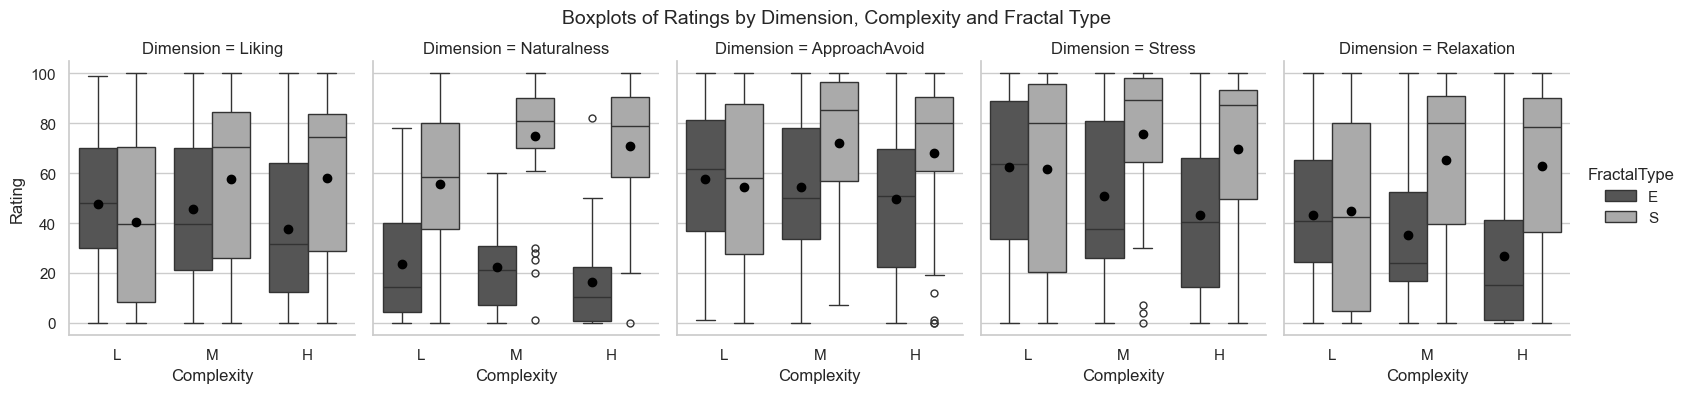

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load your rating.xlsx file
df = pd.read_excel("/Users/jiaonahu/Documents/mpib/fractalvr-writting/rating.xlsx")

# 2. Rename ID column
if df.columns[0] != "ID":
    df.rename(columns={df.columns[0]: "ID"}, inplace=True)

# 3. Define column mapping
column_mapping = {
    'v_130': 'A1_Liking', 'v_131': 'A1_Naturalness', 'v_143': 'A1_ApproachAvoid', 'v_134': 'A1_Stress', 'v_135': 'A1_Relaxation',
    'v_136': 'A2_Liking', 'v_137': 'A2_Naturalness', 'v_144': 'A2_ApproachAvoid', 'v_139': 'A2_Stress', 'v_140': 'A2_Relaxation',
    'v_141': 'A3_Liking', 'v_142': 'A3_Naturalness', 'v_145': 'A3_ApproachAvoid', 'v_146': 'A3_Stress', 'v_147': 'A3_Relaxation',
    'v_148': 'B1_Liking', 'v_149': 'B1_Naturalness', 'v_150': 'B1_ApproachAvoid', 'v_151': 'B1_Stress', 'v_152': 'B1_Relaxation',
    'v_153': 'B2_Liking', 'v_154': 'B2_Naturalness', 'v_155': 'B2_ApproachAvoid', 'v_156': 'B2_Stress', 'v_157': 'B2_Relaxation',
    'v_158': 'B3_Liking', 'v_159': 'B3_Naturalness', 'v_160': 'B3_ApproachAvoid', 'v_161': 'B3_Stress', 'v_162': 'B3_Relaxation'
}
df.rename(columns=column_mapping, inplace=True)

# 4. Label mapping for experimental conditions
label_mapping = {
    'A1': ('L', 'E'), 'A2': ('M', 'E'), 'A3': ('H', 'E'),
    'B1': ('L', 'S'), 'B2': ('M', 'S'), 'B3': ('H', 'S')
}
dimensions = ['Liking', 'Naturalness', 'ApproachAvoid', 'Stress', 'Relaxation']

# 5. Convert to long format
long_data = []
for idx, row in df.iterrows():
    user_id = row["ID"]
    for code, (comp, fractal) in label_mapping.items():
        for dim in dimensions:
            long_data.append({
                "ID": user_id,
                "Dimension": dim,
                "Complexity": comp,
                "FractalType": fractal,
                "Rating": row[f"{code}_{dim}"]
            })

df_long = pd.DataFrame(long_data)

# 6. Remove unwanted participants
df_long = df_long[~df_long["ID"].isin(["0DT2", "JGMJ5P", "MX16R1", "VU30R8"])]

# 7. Reverse code Naturalness and ApproachAvoid
for dim in ["Naturalness", "ApproachAvoid"]:
    df_long.loc[df_long["Dimension"] == dim, "Rating"] = 100 - df_long.loc[df_long["Dimension"] == dim, "Rating"]

# 8. Plotting
sns.set(style="whitegrid")
g = sns.catplot(
    data=df_long,
    x="Complexity",
    y="Rating",
    hue="FractalType",
    col="Dimension",
    kind="box",
    palette="gray",
    height=4,
    aspect=0.8,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
)

# 9. Format and save
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Boxplots of Ratings by Dimension, Complexity and Fractal Type", fontsize=14)
plt.savefig("/Users/jiaonahu/Desktop/fractal_rating_all_dimensions_boxplot.png", dpi=300)
plt.show()


# analyse all 5

In [14]:
import pandas as pd
import pingouin as pg

# Load Excel
df = pd.read_excel("/Users/jiaonahu/Documents/mpib/fractalvr-writting/rating.xlsx")

# Rename first column
if df.columns[0] != "ID":
    df.rename(columns={df.columns[0]: "ID"}, inplace=True)

# Column mapping
column_mapping = {
    'v_130': 'A1_Liking', 'v_131': 'A1_Naturalness', 'v_143': 'A1_ApproachAvoid', 'v_134': 'A1_Stress', 'v_135': 'A1_Relaxation',
    'v_136': 'A2_Liking', 'v_137': 'A2_Naturalness', 'v_144': 'A2_ApproachAvoid', 'v_139': 'A2_Stress', 'v_140': 'A2_Relaxation',
    'v_141': 'A3_Liking', 'v_142': 'A3_Naturalness', 'v_145': 'A3_ApproachAvoid', 'v_146': 'A3_Stress', 'v_147': 'A3_Relaxation',
    'v_148': 'B1_Liking', 'v_149': 'B1_Naturalness', 'v_150': 'B1_ApproachAvoid', 'v_151': 'B1_Stress', 'v_152': 'B1_Relaxation',
    'v_153': 'B2_Liking', 'v_154': 'B2_Naturalness', 'v_155': 'B2_ApproachAvoid', 'v_156': 'B2_Stress', 'v_157': 'B2_Relaxation',
    'v_158': 'B3_Liking', 'v_159': 'B3_Naturalness', 'v_160': 'B3_ApproachAvoid', 'v_161': 'B3_Stress', 'v_162': 'B3_Relaxation'
}
df.rename(columns=column_mapping, inplace=True)

# Mapping
label_mapping = {
    'A1': ('L', 'E'), 'A2': ('M', 'E'), 'A3': ('H', 'E'),
    'B1': ('L', 'S'), 'B2': ('M', 'S'), 'B3': ('H', 'S')
}
dimensions = ['Liking', 'Naturalness', 'ApproachAvoid', 'Stress', 'Relaxation']

# Containers
pairwise_results, ttest_results = [], []

# Loop through each dimension
for dim in dimensions:
    long_data = []
    for _, row in df.iterrows():
        for code, (comp, ftype) in label_mapping.items():
            long_data.append({
                "ID": row["ID"],
                "Dimension": dim,
                "Complexity": comp,
                "FractalType": ftype,
                "Rating": row[f"{code}_{dim}"]
            })
    df_long = pd.DataFrame(long_data)

    # Remove unwanted participants
    df_long = df_long[~df_long["ID"].isin(["0DT2", "JGMJ5P", "MX16R1", "VU30R8"])]

    # Reverse coding
    if dim in ["Naturalness", "ApproachAvoid"]:
        df_long["Rating"] = 100 - df_long["Rating"]

    # Remove outliers (±2.5 SD)
    df_long = df_long[
        df_long.groupby("Complexity")["Rating"]
        .transform(lambda x: abs(x - x.mean()) <= 2.5 * x.std())
    ]

    # Pairwise tests
    pw = pg.pairwise_tests(
        data=df_long,
        dv="Rating",
        within="FractalType",
        subject="ID",
        between="Complexity",
        padjust="bonf",
        parametric=True
    )
    pw["Dimension"] = dim
    pairwise_results.append(pw)

    # Paired t-tests by complexity
    for lvl in ["L", "M", "H"]:
        sub_df = df_long[df_long["Complexity"] == lvl]
        t = pg.ttest(
            sub_df[sub_df["FractalType"] == "E"]["Rating"],
            sub_df[sub_df["FractalType"] == "S"]["Rating"],
            paired=True
        )
        t["Dimension"] = dim
        t["Complexity"] = lvl
        ttest_results.append(t)

# Combine
pairwise_df = pd.concat(pairwise_results, ignore_index=True)
ttest_df = pd.concat(ttest_results, ignore_index=True)

# Filter significant only
pairwise_sig = pairwise_df[pairwise_df["p-corr"] < 0.05]
ttest_sig = ttest_df[ttest_df["p-val"] < 0.05]

# Show what columns exist (debug step)
print("Available columns in pairwise_sig:\n", pairwise_sig.columns)

# Output safe version
print("\n📌 Significant Pairwise Comparisons:")
print(pairwise_sig[["Dimension", "A", "B", "T", "p-corr"]])

print("\n📌 Significant Paired t-tests (by Complexity):")
print(ttest_sig[["Dimension", "Complexity", "T", "p-val", "CI95%"]])


Available columns in pairwise_sig:
 Index(['Contrast', 'FractalType', 'A', 'B', 'Paired', 'Parametric', 'T', 'dof',
       'alternative', 'p-unc', 'p-corr', 'p-adjust', 'BF10', 'hedges',
       'Dimension'],
      dtype='object')

📌 Significant Pairwise Comparisons:
      Dimension  A  B         T    p-corr
19  Naturalness  L  M -3.009892  0.021791

📌 Significant Paired t-tests (by Complexity):
        Dimension Complexity          T         p-val             CI95%
2          Liking          H  -2.741702  9.563736e-03   [-35.68, -5.32]
3     Naturalness          L  -5.123041  1.105852e-05   [-45.11, -19.5]
4     Naturalness          M  -9.301154  5.449193e-11  [-64.26, -41.24]
5     Naturalness          H -10.247384  4.455586e-12  [-65.56, -43.88]
7   ApproachAvoid          M  -2.372658  2.328631e-02   [-33.04, -2.57]
8   ApproachAvoid          H  -2.320343  2.627520e-02    [-34.48, -2.3]
10         Stress          M  -3.076576  4.050089e-03   [-41.36, -8.48]
11         Stress         

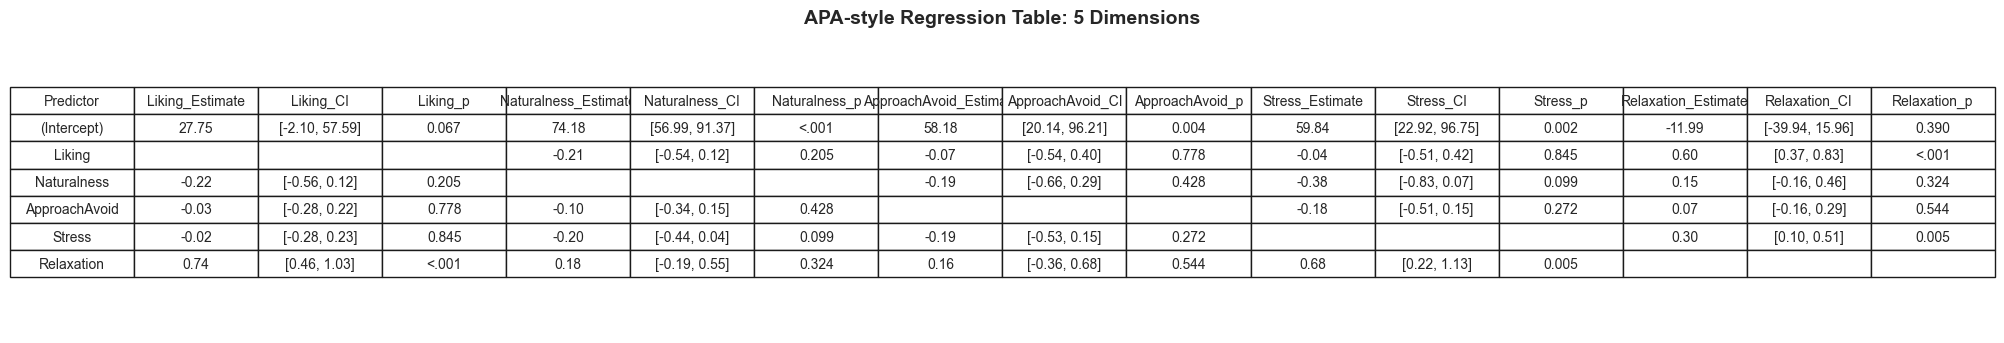

In [16]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# === Step 1: Load and prepare data ===
df = pd.read_excel("/Users/jiaonahu/Documents/mpib/fractalvr-writting/rating.xlsx")

if df.columns[0] != "ID":
    df.rename(columns={df.columns[0]: "ID"}, inplace=True)

column_mapping = {
    'v_130': 'A1_Liking', 'v_131': 'A1_Naturalness', 'v_143': 'A1_ApproachAvoid', 'v_134': 'A1_Stress', 'v_135': 'A1_Relaxation',
    'v_136': 'A2_Liking', 'v_137': 'A2_Naturalness', 'v_144': 'A2_ApproachAvoid', 'v_139': 'A2_Stress', 'v_140': 'A2_Relaxation',
    'v_141': 'A3_Liking', 'v_142': 'A3_Naturalness', 'v_145': 'A3_ApproachAvoid', 'v_146': 'A3_Stress', 'v_147': 'A3_Relaxation',
    'v_148': 'B1_Liking', 'v_149': 'B1_Naturalness', 'v_150': 'B1_ApproachAvoid', 'v_151': 'B1_Stress', 'v_152': 'B1_Relaxation',
    'v_153': 'B2_Liking', 'v_154': 'B2_Naturalness', 'v_155': 'B2_ApproachAvoid', 'v_156': 'B2_Stress', 'v_157': 'B2_Relaxation',
    'v_158': 'B3_Liking', 'v_159': 'B3_Naturalness', 'v_160': 'B3_ApproachAvoid', 'v_161': 'B3_Stress', 'v_162': 'B3_Relaxation'
}
df = df.rename(columns=column_mapping)

# === Step 2: Calculate dimension averages ===
dimensions = ['Liking', 'Naturalness', 'ApproachAvoid', 'Stress', 'Relaxation']
for dim in dimensions:
    cols = [col for col in df.columns if dim in col]
    df[dim] = df[cols].mean(axis=1)

# === Step 3: Run regression for each dimension as outcome ===
results = {}
for outcome in dimensions:
    predictors = [d for d in dimensions if d != outcome]
    X = df[predictors]
    X = sm.add_constant(X)
    y = df[outcome]
    model = sm.OLS(y, X).fit()
    results[outcome] = model

# === Step 4: Build APA-style table ===
table_data = []
for predictor in ['const'] + dimensions:
    row = {"Predictor": "(Intercept)" if predictor == 'const' else predictor}
    for outcome in dimensions:
        model = results[outcome]
        if predictor in model.params:
            est = model.params[predictor]
            ci_lower, ci_upper = model.conf_int().loc[predictor]
            pval = model.pvalues[predictor]
            row[f"{outcome}_Estimate"] = f"{est:.2f}"
            row[f"{outcome}_CI"] = f"[{ci_lower:.2f}, {ci_upper:.2f}]"
            row[f"{outcome}_p"] = "<.001" if pval < 0.001 else f"{pval:.3f}"
        else:
            row[f"{outcome}_Estimate"] = ""
            row[f"{outcome}_CI"] = ""
            row[f"{outcome}_p"] = ""
    table_data.append(row)

df_table = pd.DataFrame(table_data)

# === Step 5: Plot table using matplotlib and save ===
fig, ax = plt.subplots(figsize=(20, len(df_table) * 0.6))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=df_table.values,
    colLabels=df_table.columns,
    cellLoc='center',
    loc='center',
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.title("APA-style Regression Table: 5 Dimensions", fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig("/Users/jiaonahu/Desktop/apa_regression_table_5dims.png", dpi=300)
plt.show()


# experience with VR and video game

/var/folders/yr/7rrnl49x4hlcxhdhq2vmvh7c0000gn/T/ipykernel_35770/1602497947.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


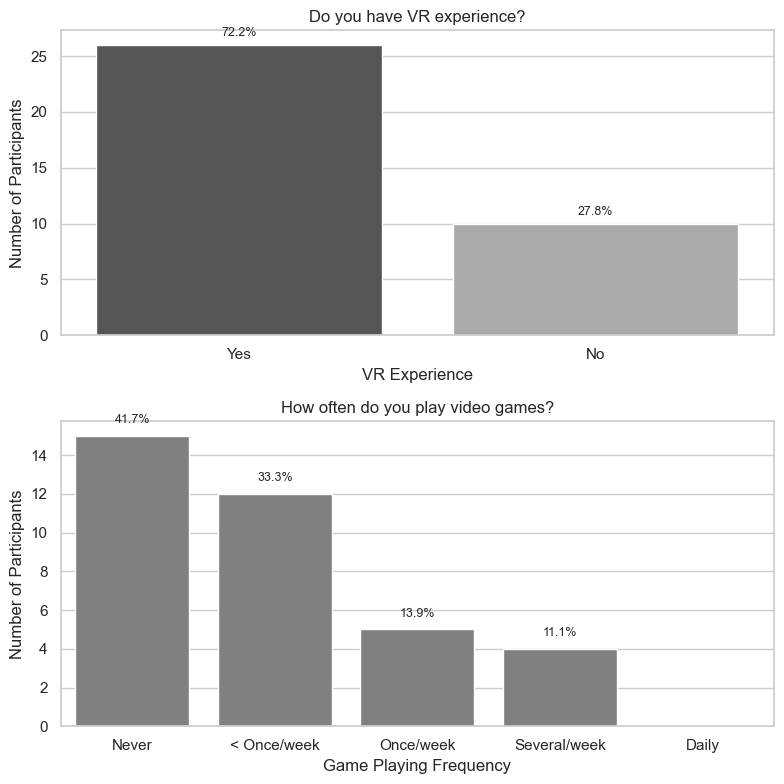

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_vr = pd.read_excel("/Users/jiaonahu/Documents/mpib/fractalvr-writting/experience with VR.xlsx")

# Rename columns
df_vr.columns = ["Index", "ID", "VR_Experience", "VR_Frequency", "Game_Frequency"]

# Remove specific participants
df_vr = df_vr[~df_vr["ID"].isin(["0DT2", "JGMJ5P", "MX16R1", "VU30R8"])]

# Map numeric answers to readable labels
vr_exp_map = {1: "Yes", 2: "No"}
game_freq_map = {
    1: "Never",
    2: "< Once/week",
    3: "Once/week",
    4: "Several/week",
    5: "Daily"
}
df_vr["VR_Experience_Label"] = df_vr["VR_Experience"].map(vr_exp_map)
df_vr["Game_Frequency_Label"] = df_vr["Game_Frequency"].map(game_freq_map)

# Set style
sns.set(style="whitegrid")

# Helper function to add percentage labels to bars
def add_percentage_labels(ax, total):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            percentage = f"{(height / total * 100):.1f}%"
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.5,
                percentage,
                ha="center",
                va="bottom",
                fontsize=9
            )

# Total number of participants (after filtering)
n_total = len(df_vr)

# Set up a combined figure with 2 subplots (vertical)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot 1: VR Experience (Yes/No)
sns.countplot(
    data=df_vr,
    x="VR_Experience_Label",
    palette="gray",
    ax=ax1
)
add_percentage_labels(ax1, n_total)
ax1.set_title("Do you have VR experience?")
ax1.set_ylabel("Number of Participants")
ax1.set_xlabel("VR Experience")

# Plot 2: Game Frequency
game_order = ["Never", "< Once/week", "Once/week", "Several/week", "Daily"]
sns.countplot(
    data=df_vr,
    x="Game_Frequency_Label",
    order=game_order,
    color="gray",
    ax=ax2
)
add_percentage_labels(ax2, n_total)
ax2.set_title("How often do you play video games?")
ax2.set_ylabel("Number of Participants")
ax2.set_xlabel("Game Playing Frequency")

# Adjust layout and save
plt.tight_layout()
plt.savefig("/Users/jiaonahu/Desktop/vr_combined_participation_summary.png", dpi=300)
plt.show()


The participant sample comprised individuals with varying levels of prior experience with virtual reality (VR) and video gaming. A subset reported having used VR before, while others indicated no prior exposure. Video game playing frequency ranged from never to daily use, with most responses falling between "less than once per week" and "several times per week." 